<a href="https://colab.research.google.com/github/vatsalsmehta/Machine-Learning-Deep-Learning/blob/main/data%20retrieval%20model%20through%20ocr/keras_ocr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Using keras_ocr library for data retrieval**

-**Vatsal Mehta** 

In [ ]:
pip install git+https://github.com/faustomorales/keras-ocr.git#egg=keras-ocr

  Cloning https://github.com/faustomorales/keras-ocr.git to /tmp/pip-install-kxdj_phy/keras-ocr
  Running command git clone -q https://github.com/faustomorales/keras-ocr.git /tmp/pip-install-kxdj_phy/keras-ocr
     |████████████████████████████████| 9.5MB 4.9MB/s 
     |████████████████████████████████| 839kB 44.0MB/s 
     |████████████████████████████████| 133kB 45.7MB/s 
     |████████████████████████████████| 51kB 5.9MB/s 
  Created wheel for keras-ocr: filename=keras_ocr-0.8.6-cp36-none-any.whl size=149772 sha256=f4039aeb0ca65d4105b44fbb883e06d82b9f123450a7a422782abd1b1b87468f
  Stored in directory: /tmp/pip-ephem-wheel-cache-gqhbpren/wheels/ba/8d/59/67aed2a9100ea1342f8d5ce47e8b7f6ac0745ba66f5917820a
Successfully built keras-ocr


In [ ]:
import matplotlib.pyplot as plt
import keras_ocr

on importing keras_ocr it will automatically download all the pretrained weights for recognizer and detector so we'll directly use it and not make a model again

How it works:

**Craft** - Used to detect text in Images <br>
**CRNN** -Used to extract content on that region( based on tensorflow)

we'll initialize the pipeline and load the already made models

In [ ]:
pipeline = keras_ocr.pipeline.Pipeline()


Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5


In [ ]:
# Get a set of any two example images from net which contain text in images 
images = [
keras_ocr.tools.read(url) for url in [
'https://i.pinimg.com/originals/90/e0/b1/90e0b16039dacc8c318c5bf1642495c4.png',
'https://upload.wikimedia.org/wikipedia/commons/b/b4/EUBanana-500x112.jpg'
]
]


In [ ]:
#to see the first images
%%html
<img src="https://i.pinimg.com/originals/90/e0/b1/90e0b16039dacc8c318c5bf1642495c4.png"></img>

In [ ]:
#to see the second image
%%html
<img src="https://upload.wikimedia.org/wikipedia/commons/b/b4/EUBanana-500x112.jpg"></img>

In [ ]:
# Each list of predictions in prediction_groups is a list of
# (word, box) tuples.
resultman = pipeline.recognize(images)


In [ ]:
resultman #see the text of each word in output 

[[('walmart', array([[ 61.060547,  21.550777],
          [380.7304  ,  21.550781],
          [380.7304  ,  88.59764 ],
          [ 61.060547,  88.59764 ]], dtype=float32)),
  ('save', array([[ 58.666016,  95.78125 ],
          [122.12109 ,  95.78125 ],
          [122.12109 , 119.72656 ],
          [ 58.666016, 119.72656 ]], dtype=float32)),
  ('bettere', array([[290.93555,  95.78125],
          [383.125  ,  95.78125],
          [383.125  , 119.72656],
          [290.93555, 119.72656]], dtype=float32)),
  ('live', array([[231.07227 ,  96.978516],
          [286.14648 ,  96.978516],
          [286.14648 , 119.72656 ],
          [231.07227 , 119.72656 ]], dtype=float32)),
  ('money', array([[127.63737 ,  94.633286],
          [226.33351 , 101.32455 ],
          [224.65863 , 126.02889 ],
          [125.96248 , 119.33763 ]], dtype=float32)),
  ('815', array([[184.3789 , 132.89648],
          [223.88867, 132.89648],
          [223.88867, 149.6582 ],
          [184.3789 , 149.6582 ]], dtype=f

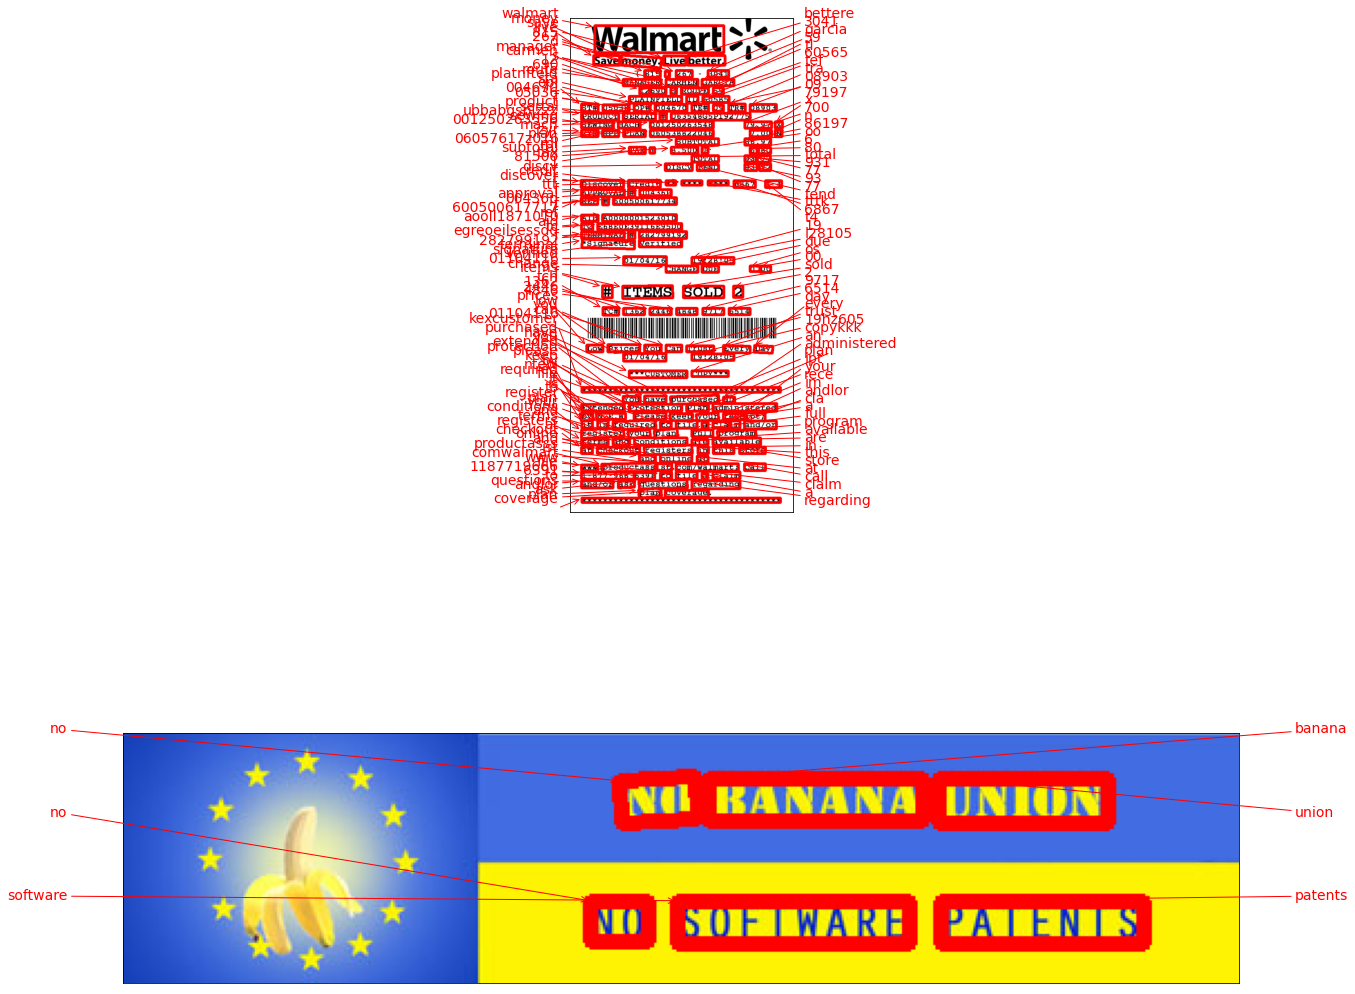

In [ ]:
#plotting results
fig, axs = plt.subplots(nrows=len(images), figsize=(20, 20))
for ax, image, predictions in zip(axs, images, resultman):
  keras_ocr.tools.drawAnnotations(image=image, predictions=predictions, ax=ax)
